In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from pandas import DataFrame
from pandas import Series

In [3]:
# read in data
df_title = pd.read_csv('title.basics.tsv', sep='\t')
df_principals = pd.read_csv('title.principals.tsv', sep='\t')
df_name = pd.read_csv('name.basics.tsv', sep='\t')
df_titleRatings = pd.read_csv('title.ratings.tsv', sep='\t')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# title_df: exclude everything except titleType= 'movie' 
df_title2=df_title[df_title.titleType=='movie']
df_title2=df_title2.loc[:,['tconst','titleType','primaryTitle','genres']]

In [5]:
# df_title_rating: merge ratings and titles drop titles with no votes/ratings
df_title2 = pd.merge(left=df_title2,right=df_titleRatings, how='left',\
                       left_on='tconst', right_on='tconst')
df_title2 = df_title2.dropna(subset=['numVotes'])

In [82]:
# df_title2.head()

In [83]:
# df_principals.head()

In [8]:
# separate principals one actor per row
df_principals= df_principals.set_index('tconst')\
    .principalCast.str.split(',', expand = True)\
    .stack().reset_index('tconst')\
    .rename(columns={0:'actor'})
    
# merge principals with ratings and titles 
df_principals = pd.merge(left=df_principals,right=df_title2, how='right',\
                       left_on='tconst', right_on='tconst')

In [9]:
df_principals.head()

,tconst,actor,titleType,primaryTitle,genres,averageRating,numVotes
0,tt0000009,nm0085156,movie,Miss Jerry,Romance,5.4,58.0
1,tt0000009,nm0183823,movie,Miss Jerry,Romance,5.4,58.0
2,tt0000009,nm0063086,movie,Miss Jerry,Romance,5.4,58.0
3,tt0000009,nm1309758,movie,Miss Jerry,Romance,5.4,58.0
4,tt0000147,nm0280615,movie,The Corbett-Fitzsimmons Fight,"Documentary,News,Sport",5.2,236.0


Actor descriptive statistics

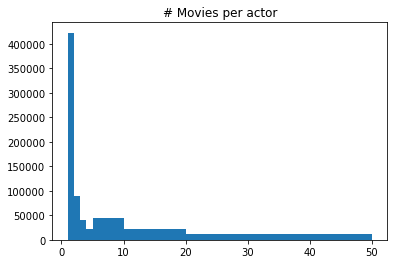

count    653698.000000
mean          2.866111
std           6.507455
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         525.000000
Name: movieCount, dtype: float64

In [76]:
# df_mpp: number of movies per principal
df_mpp= df_principals.loc[:,['tconst','actor']].groupby('actor').count().rename(columns={'tconst': 'movieCount'})

plt.title("# Movies per actor")
bins = [1,2,3,4,5,10,20,50]
plt.hist(df_mpp.movieCount, bins = bins)
plt.show()
df_mpp.movieCount.describe()

In [24]:
a = df_mpp.movieCount[df_mpp.movieCount > 1.0].count()
print("Actors in more than one movie: ",a)

Actors in more than one movie:  231255


In [84]:
print("Descriptive statistics for ratings of all actors")
df_principals.loc[:,['actor', 'averageRating']].groupby('actor').mean().averageRating.describe()

Descriptive statistics for ratings of all actors


count    653698.000000
mean          6.302655
std           1.330140
min           1.000000
25%           5.520000
50%           6.400000
75%           7.200000
max          10.000000
Name: averageRating, dtype: float64

In [80]:
print("Descriptive statistics for ratings of actors > 1 movie")
# average ratings
df_principals2 = df_principals.loc[df_principals.duplicated(subset='actor', keep=False), :]
df_principals2.loc[:,['actor', 'averageRating']].groupby('actor').mean().averageRating.describe()

Descriptive statistics for ratings of actors > 1 movie


count    231255.000000
mean          6.188054
std           0.973483
min           1.000000
25%           5.620000
50%           6.250000
75%           6.820000
max          10.000000
Name: averageRating, dtype: float64

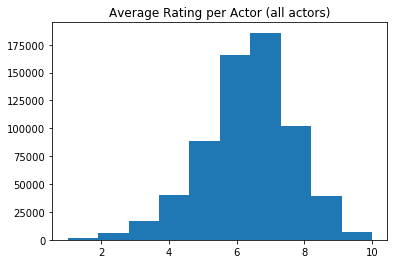

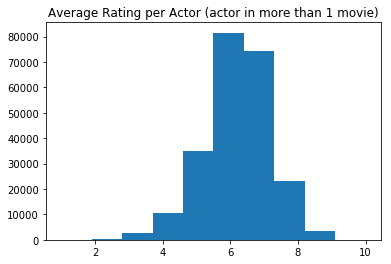

In [107]:
plt.title("Average Rating per Actor (all actors)")
plt.hist(df_principals.loc[:,['actor', 'averageRating']].groupby('actor').mean().averageRating)
plt.show()

plt.title("Average Rating per Actor (actor in more than 1 movie)")
plt.hist(df_principals2.loc[:,['actor', 'averageRating']].groupby('actor').mean().averageRating)
plt.show()

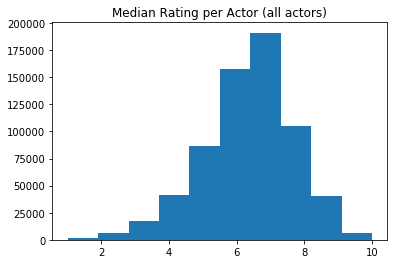

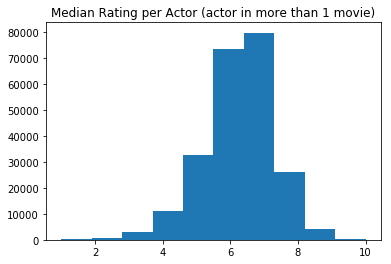

In [110]:
plt.title("Median Rating per Actor (all actors)")
plt.hist(df_principals.loc[:,['actor', 'averageRating']].groupby('actor').median().averageRating)
plt.show()

plt.title("Median Rating per Actor (actor in more than 1 movie)")
plt.hist(df_principals2.loc[:,['actor', 'averageRating']].groupby('actor').median().averageRating)
plt.show()

good mean and median spreads for actor ratings
over 200k instances if we only use actors who have been in 2 or more movie

Amjad recommended using top 20 actors. Need to look at ways to break this down (top 20 with ratings between x and y? top 20 in movies with more than x votes? actors in the most movies? top 20 by decade? slice all and compare?)